In [11]:
# lib
import requests # get url respoonse
import bs4 # response to bs4 object
import time # delay 1 sec for each page
import pandas as pd # data to csv

import matplotlib.pyplot as plt
import seaborn as sb
import re

In [12]:
# 접속할 페이지 주소 : 소스보기 -> iframe 검색 ->src, 영화 캡틴마블(2019) 영화 평점 데이터
site = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=132623&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

# site to soup
soup = requestPage(site)
data = []
# 전체 페이지수를 가져온다.
tot_page_cnt = getPageCnt()
# 페이지 0~3010 : 총 30100 개, 페이지당 댓글 10개
for idx in range(15):
    print(f'{idx+1}/10')
    print('='*100)
    url = f'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=132623&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={idx+1}'
    data.append(getResult_2(requestPage(url)))
    time.sleep(1)
df_res = pd.concat(data, ignore_index=True)
#df.to_csv('naver_satar_data.csv',index = False, encoding = 'utf-8-sig',moded = 'a')

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10
11/10
12/10
13/10
14/10
15/10


,id,score,up_vote,down_vote,reply
0,눈누난나(park****),10,7129,3427,댓글보고 진짜 별론가 싶었는데 페미에 과잉반응 사람들이 난장판 쳐논거 같네요 재밌게...
1,이지섭(kfco****),10,6418,3066,이 영화를 페미라고 하는 사람들 논리로 보면 캡틴아메리카는 그럼 남성우월주의 영화로...
2,요염한탱자(pure****),6,9057,6147,알리타가 재미있다 공감 or 캡틴마블이 재미있다 비공감
3,유범(dbqj****),10,5216,2554,ㅋㅋㅋ잼게보고옴 근데 좀 다들 기괴한거같음 ㅋㅋ 솔직히 브리라슨 이상의 실언을 하고...
4,서창원(seog****),9,4223,1695,정상인 남녀들은 아무렇지 않게 보고 나오는데 특정 남녀들만 죽으라고 싸우는 중. 근...
5,수빈(4220****),9,4309,1862,재밌기만 한데 뭘 ㅋㅋ 캡틴 마블 다 거른다면서개봉 첫날부터 부랴 부랴 댓글 남기는...
6,040614 대구중 박재호(wjse****),5,6325,3969,여성히어로는 원더우먼이 더 멋진거 같음.그리고 페미도 페미지만 고인모독은 진짜 좀 ...
7,별명없음(mimk****),10,3458,1659,솔직히 1점주는 애들은 보지도않고 그냥 브리라슨자체를 싫어하는 애들이고. 객관적으로...
8,어머(sabi****),10,2943,1380,주위남자들 불매한단소리 1도없음ㅋㅋ 여기서 댓글쓰고 추천 누르는 애들 하타취 찐따 ...
9,정아르퀴임(kimj****),10,2782,1242,"잘만들었구만~~~페미는 다른 배우들도 다 언급했는데,얘만 물어뜯는 이유좀.;;"


In [13]:
df_res['ud_ratio']=df_res.up_vote/df_res.down_vote

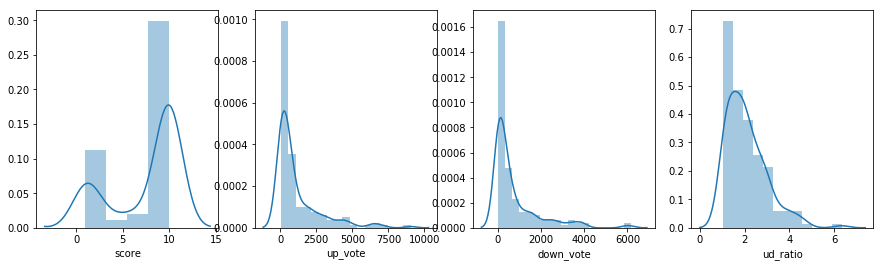

In [14]:
fig, ax = plt.subplots(1,4,figsize = (15,4))
sb.distplot(df_res.score,ax=ax[0])
sb.distplot(df_res.up_vote,ax=ax[1])
sb.distplot(df_res.down_vote,ax=ax[2])
sb.distplot(df_res.ud_ratio,ax=ax[3])
plt.show()

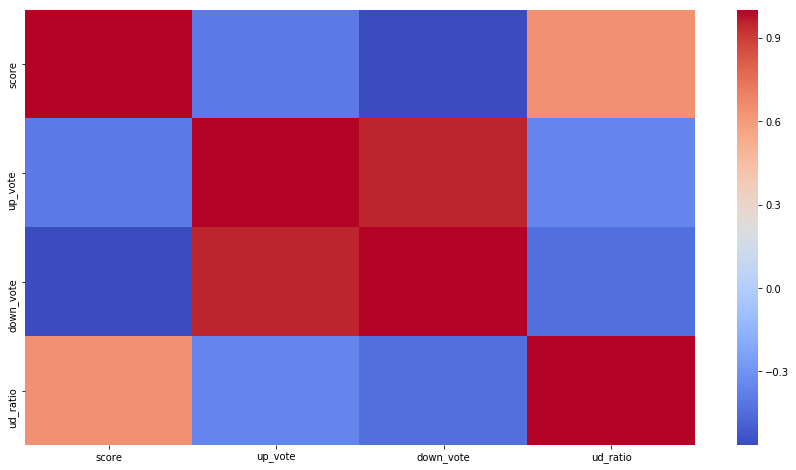

In [15]:
fig,ax  = plt.subplots(figsize=(15,8))
corr = df_res.corr()
sb.heatmap(corr,cmap='coolwarm')

In [16]:
# url 받아서 bs4 객체를 반환하는 함수
# xlml 파서를 쓰면 tag 방식을 쓰는 모든 문서 타입에 적용할 수 있다.
def requestPage(url):
    response = requests.get(url)
    soup = bs4.BeautifulSoup(response.text, 'lxml')
    return soup

In [17]:
# 필요한 정보를 가져온다.
def getResult_2(soup):  
    
    #해당 페이지의 댓글 ,id, 평점, up_vote, down_vote 을 가져온다.
    reply_list = soup.select('div.score_result li div.score_reple>p')
    id_list = soup.select('div.score_result li div.score_reple>dl>dt>em>a>span')
    score_list = soup.select('div.score_result li div.star_score em')
    up_vote_list = soup.select('div.score_result li div.btn_area>strong:nth-child(2) > span')
    down_vote_list  = soup.select('div.score_result li div.btn_area> strong:nth-child(4)> span')
    result = []
    for li in [score_list,up_vote_list,down_vote_list]:
        result.append([int(re.sub(',','',tag.text)) for tag in li])
    for li in [id_list,reply_list]:
        result.append([tag.text for tag in li])
    res = pd.DataFrame({'id':result[3],'score':result[0],'up_vote':result[1],'down_vote':result[2],'reply': result[4]})
    return res
    

In [18]:
# 전체 페이지 개수를 반환하는 함수
def getPageCnt():
    #접속할 페이지 주소
    url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=132623&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text,'lxml')
    cnt = soup.select('div.score_total>strong.total>em')[0].text
    cnt = int(re.sub(r',','',cnt))
    
    # 한 페이지당 댓글이 10개다.
    if cnt%10 > 0:
        cnt = cnt +1
    return cnt//10